In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Set up the Kaggle API command to download the dataset
!kaggle datasets download -d hojjatk/mnist-dataset

# Unzip the downloaded dataset
import zipfile

# Assuming the dataset is downloaded as a zip file in the current directory
dataset_zip = 'mnist-dataset.zip'

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('mnist_dataset')  # Extract the dataset to 'mnist_dataset' folder

# Now the data is in the 'mnist_dataset' folder

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
 50% 11.0M/22.0M [00:00<00:00, 104MB/s]
100% 22.0M/22.0M [00:00<00:00, 148MB/s]


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the downloaded dataset
train_data = MNIST(root='./', train=True, download=True, transform=transform)
test_data = MNIST(root='./', train=False, download=True, transform=transform)

# Create data loaders
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

# Example: Print shape of the data
for X, y in train_dataloader:
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    break

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14420698.87it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 433184.43it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3944702.23it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5971952.59it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


In [ ]:
import torch.nn as nn

# Use the appropriate device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

# Define the MLP model for MNIST
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 512),   # Adjusted input size for 50x50 images
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # Output layer for 10 classes (digits 0-9)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.layers(x)

model = MLP().to(device)
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Using cpu device
MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
def train(data_loader, model, criterion, optimizer):
    model.train()
    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    total_loss = 0
    total_correct = 0

    for data, target in data_loader:
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)
        total_loss += loss

        # Count correct predictions
        total_correct += (torch.argmax(output, dim=1) == target).sum().item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    train_loss = total_loss / num_batches
    accuracy = total_correct / num_items

    print(f"Average loss: {train_loss:.6f}, accuracy: {accuracy:.2%}")

In [ ]:
epochs = 10  # Adjust the number of epochs as needed
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_dataloader, model, criterion, optimizer)

Training epoch: 1
Average loss: 0.329277, accuracy: 89.60%
Training epoch: 2
Average loss: 0.147255, accuracy: 95.47%
Training epoch: 3
Average loss: 0.109142, accuracy: 96.57%
Training epoch: 4
Average loss: 0.090061, accuracy: 97.15%
Training epoch: 5
Average loss: 0.073444, accuracy: 97.67%
Training epoch: 6
Average loss: 0.066563, accuracy: 97.85%
Training epoch: 7
Average loss: 0.057680, accuracy: 98.19%
Training epoch: 8
Average loss: 0.053012, accuracy: 98.27%
Training epoch: 9
Average loss: 0.045369, accuracy: 98.54%
Training epoch: 10
Average loss: 0.044777, accuracy: 98.55%


Training epoch: 1
Training epoch: 2
Training epoch: 3
Training epoch: 4
Training epoch: 5
Training epoch: 6
Training epoch: 7
Training epoch: 8
Training epoch: 9
Training epoch: 10
Training epoch: 11
Training epoch: 12
Training epoch: 13
Training epoch: 14
Training epoch: 15
Training epoch: 16
Training epoch: 17
Training epoch: 18
Training epoch: 19
Training epoch: 20
Training epoch: 21
Training epoch: 22
Training epoch: 23
Training epoch: 24
Training epoch: 25
Training epoch: 26
Training epoch: 27
Training epoch: 28
Training epoch: 29
Training epoch: 30
Training epoch: 31
Training epoch: 32
Training epoch: 33
Training epoch: 34
Training epoch: 35
Training epoch: 36
Training epoch: 37
Training epoch: 38
Training epoch: 39
Training epoch: 40
Training epoch: 41
Training epoch: 42
Training epoch: 43
Training epoch: 44
Training epoch: 45
Training epoch: 46
Training epoch: 47
Training epoch: 48
Training epoch: 49
Training epoch: 50


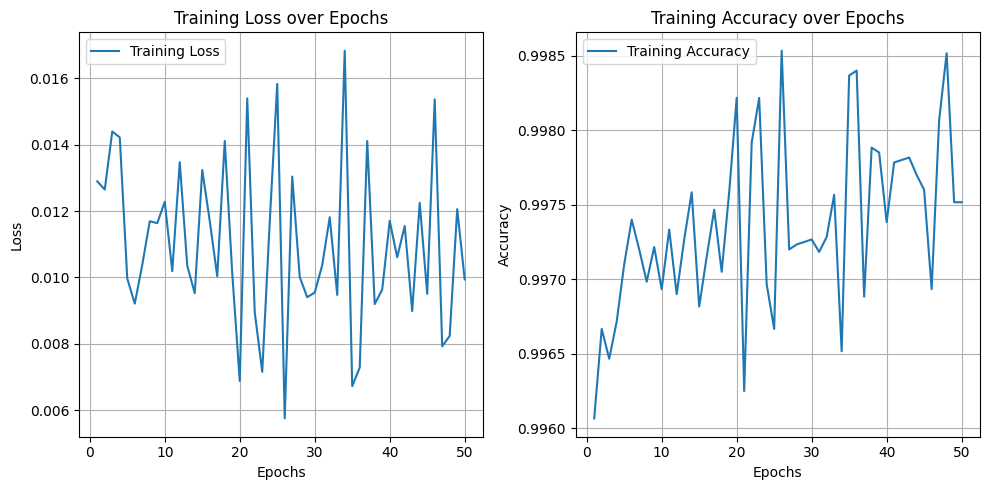

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store loss and accuracy for each epoch
losses = []
accuracies = []

# Modify your training loop to collect loss and accuracy for each epoch
epochs = 50
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train_loss, accuracy = train(train_dataloader, model, criterion, optimizer)  # Assume train() returns these values
    losses.append(train_loss)
    accuracies.append(accuracy)

# Plot the Loss Graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()

# Plot the Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
def evaluate(model, data_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    total_correct = 0
    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    with torch.no_grad():  # Disable gradient computation
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)

            # Forward pass
            output = model(data)

            # Calculate the loss
            loss = criterion(output, target)
            total_loss += loss.item()

            # Count correct predictions
            total_correct += (torch.argmax(output, dim=1) == target).sum().item()

    # Calculate average loss and accuracy
    average_loss = total_loss / num_batches
    accuracy = total_correct / num_items

    return average_loss, accuracy

# Evaluate the model on test data
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion)

print(f"Final Test Loss: {test_loss}")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Loss: 0.2002755037991042
Final Test Accuracy: 98.33%
